# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def draw_two_curves(x_data, y_data, label_data, colors, markers, x_label="Step", y_label="Score", save_path="fig.pdf"):
    assert len(x_data) == len(y_data) == len(label_data) == len(colors) == len(markers)
    fig, ax = plt.subplots(figsize=(8, 3.5))

    for x, y, l, c, m in zip(x_data, y_data, label_data, colors, markers):
        ax.plot(x, y, '-', marker=m, color=c, label=l)

    ax.set_xlabel(x_label, fontweight ='normal', fontsize=15)
    ax.set_ylabel(y_label, fontweight ='normal', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=13.5)

    plt.tight_layout()

    plt.legend(fontsize=14)
    plt.savefig(save_path, bbox_inches="tight", dpi=1800)
    plt.show()

In [4]:
# Our Method
x_data = [
    [0, 100, 200, 300, 400, 500],
    [0, 100, 200, 300, 400, 500],
]
rouge1_scores = [
    [20.987164857456154, 27.424158717105318, 29.664126480263274, 31.657146546052687, 31.368269956140338, 31.80626047149124], # ours
    [20.619396655701802, 28.277027357456134, 30.260662061403544, 31.392998793859693, 31.433, 32.26089018640358],
]
rougeLsum_scores = [
    [16.827621655701762, 23.6621311403509, 25.322441173245675, 26.43489736842107, 26.189450164473705, 26.79345992324566],  # ours
    [16.692347752193015, 23.722649067982474, 24.854719517543863, 25.60068048245616, 26.310, 26.70221134868427],
]
pref_scores = [
    [0.2070840314814919, 1.24788819880862, 1.5685052074361265, 1.3737444668485408, 1.6416086198990805, 1.7085058030329252],  # ours
    [0.1775466666409844, 0.703104870884042, 1.0823752116738705, 1.0325134960575062, 1.2145, 1.3910809520043825]
]

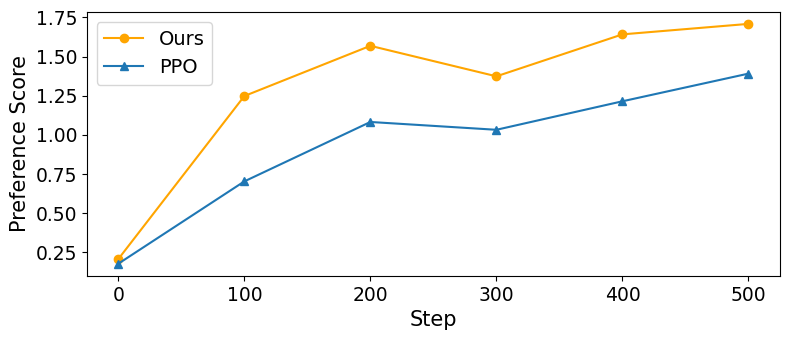

In [5]:
draw_two_curves(
    x_data,
    pref_scores,
    ["Ours", "PPO"],
    colors=["Orange", None],
    markers=["o", "^"],
    x_label="Step",
    y_label="Preference Score",
    save_path="figures/eval_pref_curve.pdf"
)

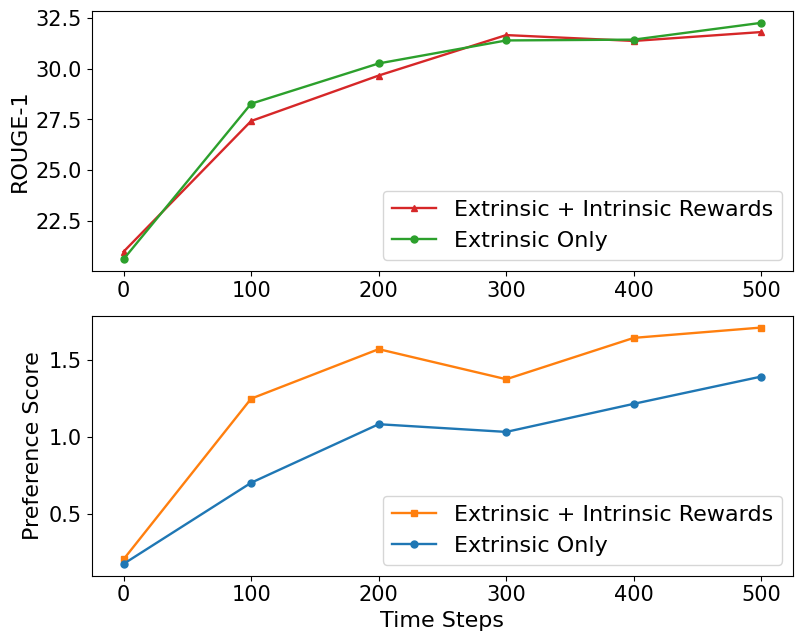

In [6]:
# plt.figure(figsize=(4.5, 3.5))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6.5))
# ax3 = ax1.twinx()

l3, = ax1.plot(x_data[0], rouge1_scores[0], marker="^", markersize=5.0, color='tab:red', lw=1.7, label='Extrinsic + Intrinsic Rewards')
l1, = ax1.plot(x_data[1], rouge1_scores[1], marker='o', markersize=5.0, color='tab:green', lw=1.7, label='Extrinsic Only')

l2, = ax2.plot(x_data[0], pref_scores[0], marker="s", markersize=5.0, color='tab:orange', lw=1.7, label='Extrinsic + Intrinsic Rewards')
l4, = ax2.plot(x_data[1], pref_scores[1], marker='o', markersize=5.0, color='tab:blue', lw=1.7, label='Extrinsic Only')

ax1.set_ylabel('ROUGE-1', fontweight='normal', fontsize=16)
ax2.set_ylabel('Preference Score', fontweight='normal', fontsize=16)
ax2.set_xlabel('Time Steps', fontweight='normal', fontsize=16)
# ax3.set_ylabel('ROUGE Score', fontweight ='normal', fontsize=14)

# plt.title('ROC Curve ')
# fig.legend(loc="center right", borderaxespad=5.0)
# fig.legend(loc="center right", bbox_to_anchor=(0.9, 0.51), fontsize=14)
legend1 = ax1.legend(fontsize=16)
legend2 = ax2.legend(fontsize=16)

# legend1.get_frame().set_linewidth(0)
# legend2.get_frame().set_linewidth(0)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('figures/eval_rouge_pref_curve.png', dpi=1800)
plt.show()